In [ ]:
#TODO here:
#1. Perhaps add some info on numpy arrays
#2. See if I can better end the plotseries function so that it doesn't end with an error
    (https://scipy-cookbook.readthedocs.io/items/Matplotlib_Interactive_Plotting.html)
#3. Add more questions and answer boxes??

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
import tkinter

## Preliminaries

Authored by *David J. Heeger*  1/26/2004<br>
Translated into Python by *Chrysa Papadaniil* 7/21 <br>

This tutorial demonstrates how to load and view some fMRI data in Python.
In the process it provides some examples of Python code that you can use to build your own more sophisticated analysis tools.

To run the tutorial, you read the comments (like this one) and evaluate
the code in the cells below it. Read the code as you go to see how it works. To
evaluate the code for each cell, you can either: 1) press press SHIFT+ENTER, or 2) press the play button in the toolbar above.

In [5]:
#Paths for tutorials and for data
data_path = os.getcwd() + '/data/CannedData_DS/'

## Loading and displaying MRI images

Directory CannedData_DS has 5 subdirectories:
    
08+Bold_030314<br>
09+Bold_030314<br>
10+Bold_030314<br>
11+t1_se_tra_concat_2<br>
12+t1_mprage_sag

Series 08, 09, 10 contain functional data. Series 11 contains the
inplane anatomical images with the same slice prescription as the
functional data. Series 12 contains high-resolution mprage anatomical
images.

Let's load the inplane images. We will use the NiBabel package provides tools for using python to read and write MRI-related file types like .hdr, .img, and .nii.

In [7]:
inplane = nib.load(data_path + '/11+t1_se_tra_concat_2/DS030975+11+t1_sra_concat_2.img').get_data() 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


The variable 'inplane' now contains an array of image data. The size of the array is:

In [8]:
inplane.shape

(128, 128, 35)

The first index is the x-coordinate. The second index is the y-coordinate. And the third index is the slice. To pull out the 10th slice, evaluate:

In [5]:
slice10 = inplane[:,:,9];

If you are not familiar with the colon syntax in Python, then you should learn about it. You'll be seeing quite a lot of it.

Load the hi-res mprage anatomical images:

In [6]:
mprage = nib.load(data_path + '/12+t1_mprage_sag/DS030975+12+t1_mprage_sag.img').get_data() 

<div class="alert alert-info" role="alert">
  <strong>Question</strong> <br>
    What is the size of the mprage images?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

Load the data from the first functional MRI scan:

In [7]:
bold_1 = nib.load(data_path + '/08+Bold_030314/DS030975+08+Bold_030314.img').get_data() 

Let's view the inplane images first. This little widget allows you to drag the slider to change the slice that we are taking, letting us move back and forth through the brain viewing a series of 2D views.

Give it a try.

In [8]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=inplane.shape[2]-1, step=1, value=0))
def plot_anatomy(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(inplane[:, :, slice]),'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=34), Output()), _dom_classes=('widget-intera…

The function "plot_anatomy" automatically chooses how to rescale the images for display. You can also control the rescaling yourself, which comes in handy to help visualize certain aspects of the images more clearly. Remember that the images arrays are just filled with numbers. We display them by converting those numbers to grayscale intensities.

Let's redisplay the inplanes by clipping values below 200 and above 800.

In [9]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=inplane.shape[2]-1, step=1, value=0))
def plot_anatomy(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(inplane[:, :, slice]),'gray').set_clim(200, 800)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=34), Output()), _dom_classes=('widget-intera…

Now display the hires mprage anatomical images:

In [10]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=mprage.shape[2]-1, step=1, value=0))
def plot_anatomy(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(mprage[:, :, slice]),'gray').set_clim(50, 800)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=255), Output()), _dom_classes=('widget-inter…

For your orientation, we are looking at the person's brain from the top with slice 0 being the lowest one and slice 256 at the top of the head. The slices above are axial (horizontal) slices (from bottom to top). 

You can redisplay the hires mprage in saggital slices:

In [11]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=mprage.shape[0]-1, step=1, value=0))
def plot_anatomy(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(mprage[slice, :, :]),'gray').set_clim(50, 800)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=175), Output()), _dom_classes=('widget-inter…

And coronal (from back to front):

In [12]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=mprage.shape[1]-1, step=1, value=0))
def plot_anatomy(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(mprage[:, slice, :]),'gray').set_clim(50, 800)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=255), Output()), _dom_classes=('widget-inter…

The functional data are stored in a 4D array, where the fourth dimension is time so that the indices correspond to [x y z t]:

In [13]:
bold_1.shape

(64, 64, 35, 131)

<div class="alert alert-info" role="alert">
  <strong>Question</strong> <br>
    How many timepoints are in the functional data? Why are the first three dimensions different than the ones in the anatomical data?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

If we want to view 2D views of the fuctional data we need to select a plane in which we "cut" or slice the brain like in the structural image, but we also have a fourth dimension of time that is 131 elements long.

So if we want to plot we need to choose one of the spatial dimensions to slice through and also a single timepoint for which we'd like to see that plane.

Here is a version of the slider image we looked at before using the anatomical data.

In [14]:
@widgets.interact(slice=widgets.IntSlider(min=0, max=bold_1.shape[2]-1, step=1, value=0))
def plot_functional(slice):
    tp=4
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(bold_1[:, :, slice, tp]),'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=34), Output()), _dom_classes=('widget-intera…

Note that the image quality is pretty crummy compared to the anatomical images that you've been viewing up until now. That's because each full volume of functional images was acquired every 2 sec whereas it took several minutes to acquire the anatomical images. The functional images are acquired in a different way to be sensitive to variations in bold oxygen level dependent (BOLD) signal over time.

Let's now plot the time series (image intensity over time) for an individual voxel.

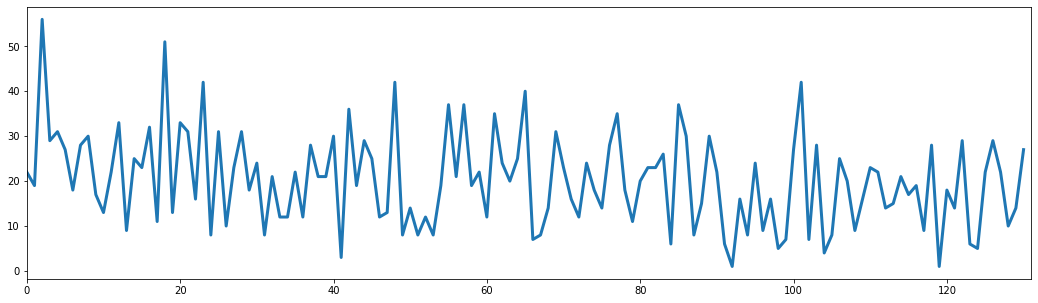

In [15]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(bold_1[32,54,10,:], lw=3)
ax.set_xlim([0, bold_1.shape[3]])
plt.show()

Try another one.

In [38]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(bold_1[32,12,10,:], lw=3)
ax.set_xlim([0, bold_1.shape[3]])
plt.show()

This was a visual stimulation experiment in which a stimulus was displayed in the right hemifield for 10 seconds and then in the left hemifield for the next 10 seconds. So you should see a modulation in time series at locations in visual cortex that are stimulated by either the left or right halves of the visual field.

The function 'plotTseries' lets you do this interactively. Take a look at the source code for this function. Because the inplanes are registered with the functional images, we display an inplane slice to click on and then extract the corresponding time series from the functionals. Try to find some interesting voxels. The function 'ginput' prompts you to select a pixel by clicking on the figure. Click left to select a point. Close the window to quit and try a different slice. 

In [35]:
def plotTseries(inplane,bold,slice,TR):
    
    #compute duration in seconds for use later in making the plot
    duration = TR*bold.shape[3]
    timepoints = np.arange(TR,duration, TR)
    
    #display the inplane
    %matplotlib qt
    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[20,25], gridspec_kw={'height_ratios': [2, 1]})
    ax1.imshow(np.rot90(inplane[:, :, slice]),'gray')

    while True:
        # Get mouse click on inplane
        pts = plt.ginput(n=1, timeout=4)
        x0 = pts[0][0]
        y0 = pts[0][1]
        # Divide x and y coordinates by 2 because inplane resolution is 
        # twice that of the functional images
        x0=round(x0/2)
        y0=round(y0/2)
        ax2.clear()
        # Plot the chosen voxel time series
        ax2.plot(bold_1[x0,y0,slice,:], lw=3)
        ax2.set_xlim([0, bold_1.shape[3]])
        ax2.set_xlabel('Time [s]', fontsize=8)
        ax2.set_ylabel('Image intensity', fontsize=8)
        ax2.set_title('Voxel time course', fontsize=8)
        ax2.tick_params(labelsize=8)
        plt.show()

In [37]:
slice = 10;
TR = 2;
plotTseries(inplane,bold_1,slice,TR)

IndexError: list index out of range

//anaconda3/lib/python3.7/site-packages/ipykernel/eventloops.py:106: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  app.exec_()
